**CASO 2: PARED PLANA EN ESTADO ESTACIONARIO SIN GENERACIÓN DE CALOR, TEMPERATURA FIJA EN UN EXTREMO Y CONVECCIÓN EN OTRO EXTREMO**


Considere una pared plana en estado estacionario con propiedades termofísicas y condiciones de frontera conocidas, en este caso se conoce la temperatura en el extremo izquierdo, mientras que el extremo derecho está sujeto a convección. Se desea aproximar las temperaturas de M nodos interiores usando el método de diferencias finitas. No se considera generación de calor. A continuación se presenta la rutina de Python para resolver el problema.

INICIALIZAR

Se importan las librerías necesarias. En este caso la librería *numpy* para los cálculos relacionados con vectores y matrices, y la librería *matplotlib* para los gráficos.

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

MALLA UNIDIMENSIONAL

Es necesario establecer la malla sobre la cual se calcularán las temperaturas. Esto implica conocer la longitud de la pared (dato de entrada) y el número de nodos (dato definido por el usuario).

In [13]:
L=5
n=100
dx=L/(n-1)
x=np.linspace(0,L,n)

CONDICIONES DE FRONTERA

Seguidamente, se establecen las condiciones de frontera. Para esto, hay que crear un vector de temperatura de una longitud de $n$ nodos, sobre el cual se impondrán las condiciones de frontera, en los extremos, y se resolverán las temperaturas de los nodos interiores por MDF.

In [14]:
T=np.array(np.zeros(n))
TL=0
T[0]=TL
h=28
k=45
T_amb=30

CRITERIO DE CONVERGENCIA

El MDF (Método de diferencias finitas) debe resolverse usando métodos de solución directa o de solución iterativa. En este caso se usarán métodos iterativos (Método de Jacobi), razón por la cuál se debe establecer un error admisible al cuál llamaremos *tolerancia*, que representa el parámetro para el cual suponemos que la solución es lo suficientemente "exacta".

In [15]:
tol=0.0001
error=1
iter=0

Cuando se especifíca una condición de frontera como "convección en un extremo", la ecuación en diferencias finitas para el nodo en esa forntera se obtiene al escribir el balance de energía sobre el elemento de volumen en la frontera, el cual puede expresarse según la siguiente ecuación:

\begin{equation*}
\sum_{\text {Todos los lados }} \dot{Q}+\dot{E}_{\mathrm{gen}, \text { elemento }}=0
\end{equation*}

Por lo tanto, para el nodo de la frontera derecha, el balance de energía puede expresarse como: *el calor de convección* + *el calor proveniente del noto que está a la izquierda (nodo interior m-1)* debe ser igual a cero, es decir:

\begin{equation*}
\dot{Q}_{conveccion} + kA\dfrac{T_{m-1}-T_m}{Δx} = 0
\end{equation*}

O de forma más detallada:

\begin{equation*}
hA(T_{∞}-T_m) + kA\dfrac{T_{m-1}-T_m}{Δx} = 0~~~~~~~~~~~~~~~~~~(2)
\end{equation*}

En donde:

$h$=Coeficiente de transferencia de calor por convección (dato de entrada)

$A$ = Área de transferencia de calor

$T_{∞}$= Temperatura del medio para los cálculos de convección

Al hacer un pequeño tratamiento algebráico a la Ecuación (2), y despejar el término $T_m$, se obtiene la Ecuación que debe ser programada en el bucle *while* de Python para el tratamiento del nodo frontera:

\begin{equation*}
T_m=\dfrac{\dfrac{k}{Δx}T_{m-1}+hT_{∞}}{\left(\dfrac{k}{Δx}+h \right)}~~~~~~~~~~~~~~~~~~(3)
\end{equation*}

Para el tratamiento de los nodos interiores, se usa la misma ecuación del CASO 1: 
\begin{equation*}
T_m=\dfrac{T_{m-1}+T_{m+1}}{2}
\end{equation*}



In [16]:
while error>tol:
    Told=np.copy(T)
    T[-1]=((k/dx)*Told[n-2]+h*T_amb)/((k/dx)+h)
    for i in range(1, n-1):
        T[i]=0.5*(Told[i-1]+Told[i+1])
    error=np.max(np.abs(np.array(Told-T)))
    iter=iter+1

MOSTRAR RESULTADOS

In [17]:
np.set_printoptions(precision=2)
print(T)

[ 0.    0.23  0.45  0.68  0.9   1.13  1.35  1.58  1.8   2.03  2.25  2.48
  2.7   2.93  3.16  3.38  3.61  3.83  4.06  4.28  4.51  4.74  4.96  5.19
  5.41  5.64  5.87  6.09  6.32  6.54  6.77  7.    7.22  7.45  7.68  7.9
  8.13  8.36  8.58  8.81  9.04  9.27  9.49  9.72  9.95 10.17 10.4  10.63
 10.86 11.09 11.31 11.54 11.77 12.   12.23 12.46 12.68 12.91 13.14 13.37
 13.6  13.83 14.06 14.29 14.52 14.75 14.98 15.2  15.43 15.66 15.89 16.12
 16.35 16.58 16.82 17.05 17.28 17.51 17.74 17.97 18.2  18.43 18.66 18.89
 19.12 19.36 19.59 19.82 20.05 20.28 20.51 20.75 20.98 21.21 21.44 21.67
 21.91 22.14 22.37 22.6 ]


GRAFICO

Se agrega gráfico

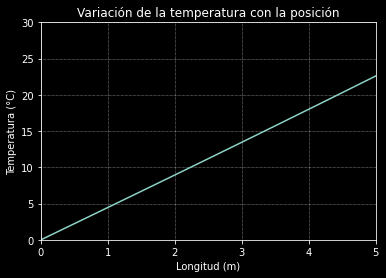

In [18]:
plt.style.use("dark_background")
plt.plot(x,T)
plt.title("Variación de la temperatura con la posición")
plt.xlabel("Longitud (m)")
plt.ylabel("Temperatura (°C)")
plt.xlim(0,L)
plt.ylim(0,30)
plt.grid(linestyle=":", linewidth=0.5)
plt.show()